   
WarmUp
=======

Trend-Seasonal
=======

Differencing
===========

**Times series course**  
IMT Mines ALES  
2IA - 2022



## Shampoo sales

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

The `shampoo_sales.csv` time series describes monthly sales of a certain shampoo over a 3-year period, from the beginning of 1995. 

Read the `shampoo_sales.csv` time series with the appropriate time index, and plot it.

            Sales of shampoo
1995-01-01             266.0
1995-02-01             145.9
1995-03-01             183.1
1995-04-01             119.3
1995-05-01             180.3
1995-06-01             168.5
1995-07-01             231.8
1995-08-01             224.5
1995-09-01             192.8
1995-10-01             122.9
1995-11-01             336.5
1995-12-01             185.9
1996-01-01             194.3
1996-02-01             149.5
1996-03-01             210.1
1996-04-01             273.3
1996-05-01             191.4
1996-06-01             287.0
1996-07-01             226.0
1996-08-01             303.6
1996-09-01             289.9
1996-10-01             421.6
1996-11-01             264.5
1996-12-01             342.3
1997-01-01             339.7
1997-02-01             440.4
1997-03-01             315.9
1997-04-01             439.3
1997-05-01             401.3
1997-06-01             437.4
1997-07-01             575.5
1997-08-01             407.6
1997-09-01             682.0
1997-10-01    

<AxesSubplot:>

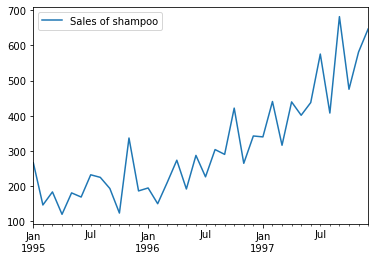

In [3]:
#On construit nos données brutes
df = pd.read_csv('../data/shampoo_sales.csv', header = 0, names =['Sales of shampoo'])
#print("\n",df)

#On crée le vecteur temporel mensuel de la taille des données brutes
time_index = pd.date_range('1995 Jan', periods = len(df), freq ='MS')
#print(time_index)

#L'index de notre df correspond au vecteur temporel
df.index = time_index
print(df)
df.plot()

Autre option :

Month
1995-01-01    266.0
1995-02-01    145.9
1995-03-01    183.1
1995-04-01    119.3
1995-05-01    180.3
Name: Sales, dtype: float64

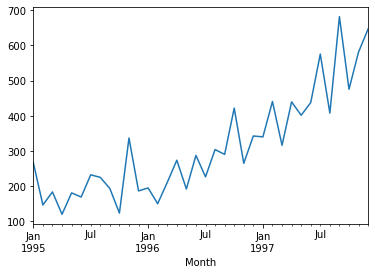

In [6]:
# Correction
 
from datetime import datetime

def parser(x):
    return datetime.strptime( '199' + x, '%Y-%m') + pd.offsets.DateOffset(years=4)
 
df = pd.read_csv('../data/shampoo_sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
df.plot()
df.head()

Create a function `difference` that takes as parameter the time series and the interval of differencing, and return the differenced time series.

In [54]:
#Différencier une fois réduit le degré de 1, donc différencier n fois réduit le degré de n du polynome de notre série
def difference(dataframe,interval): #df = times series, interval
    new_df = list()
    for i in range(interval, len(dataframe)):
        val = dataframe[i] - dataframe[i - interval]
        new_df.append(val)    
    return  pd.Series(new_df)   
#L'interval indique le nombre de termes en moins dans notre nouvelle série

In [ ]:
#Correction

#create a differenced series

#def difference(ts, interval=1):
#    diff = list()
#    for i in range(interval, len(ts)):
#        value = ts[i] - ts[i - interval]
#        diff.append(value)
#    return pd.Series(diff)

Try the difference function to remove trend and seasonality.

<AxesSubplot:>

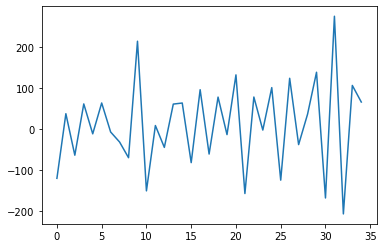

In [55]:
difference(df['Sales of shampoo'],1).plot() #interval = 1 différencie terme à terme donc dans notre cas, mois par mois

In [7]:
#x = df.values
#diff = difference(x)
#plt.plot(diff)
#plt.show()

## Synthetized time series

Create a recusrive function `rec_difference()` that applies the `difference()` function several times.

Create a time series with a polynomial trend of order 3.
Use the `rec_difference()` function to remove the trend. 

In [61]:
def rec_difference(dataframe,interval,n):
    new_dataframe = dataframe
    for i in range(n) :
        new_dataframe = difference(new_dataframe,interval)
    return new_dataframe 

<AxesSubplot:>

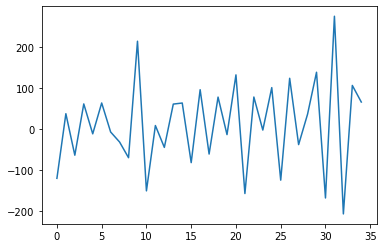

In [62]:
rec_difference(df['Sales of shampoo'],1,1).plot()
#n = 0 correspond au signal original
#n = 1 correspond à la première différentiation
#n = 2 indique qu'on a appliqué deux fois la différence

In [63]:
# Generate series from start of 2020 to end of 2022 (notre vecteur temporel)
time_series = pd.date_range(start='2020-01-01', end='2022-12-31', freq='D') #'D' indique une construction jour par jour
#Finalement je ne m'en sers pas 

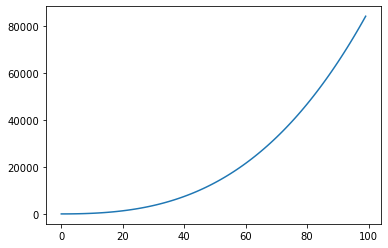

In [81]:
#On crée un signal d'ordre 3
#x = [(1/15) * x**3 + 2 * x**2 - (1/5) * x + 7 + 1000*np.random.randn() for x in range(100)]
x = [(1/15) * x**3 + 2 * x**2 - (1/5) * x + 7 for x in range(100)] #on a retiré le bruit blanc
plt.plot(x)

<AxesSubplot:>

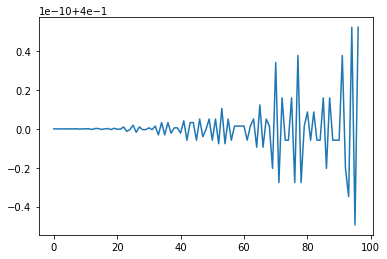

In [84]:
rec_difference(x,1,3).plot() #Appliquer 3 fois la différenciation à un signal d'ordre 3 est supposé nous retourner un signal d'ordre 0 donc une constante (presque)